In [62]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [63]:
input_dir = "./images/"
target_dir = "./annotations/trimaps/"

img_size = (160, 160)

img_src = sorted(
    [
        os.path.join(input_dir, filename)
        for filename in os.listdir(input_dir)
        if filename.endswith(".jpg")
    ]
)

mask_src = sorted(
    [
        os.path.join(target_dir, filename)
        for filename in os.listdir(target_dir)
        if filename.endswith(".png") and not filename.startswith(".")
    ]
)

for input_path, target_path in zip(img_src[:10], mask_src[:10]):
    print(input_path, "|", target_path)

./images/Abyssinian_1.jpg | ./annotations/trimaps/Abyssinian_1.png
./images/Abyssinian_10.jpg | ./annotations/trimaps/Abyssinian_10.png
./images/Abyssinian_100.jpg | ./annotations/trimaps/Abyssinian_100.png
./images/Abyssinian_101.jpg | ./annotations/trimaps/Abyssinian_101.png
./images/Abyssinian_102.jpg | ./annotations/trimaps/Abyssinian_102.png
./images/Abyssinian_103.jpg | ./annotations/trimaps/Abyssinian_103.png
./images/Abyssinian_104.jpg | ./annotations/trimaps/Abyssinian_104.png
./images/Abyssinian_105.jpg | ./annotations/trimaps/Abyssinian_105.png
./images/Abyssinian_106.jpg | ./annotations/trimaps/Abyssinian_106.png
./images/Abyssinian_107.jpg | ./annotations/trimaps/Abyssinian_107.png


In [64]:
print(len(img_src), len(mask_src))

7390 7390


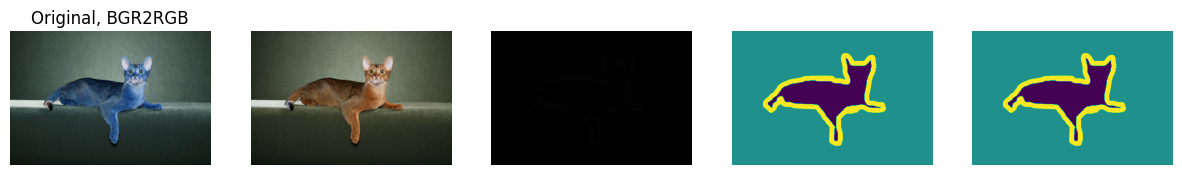

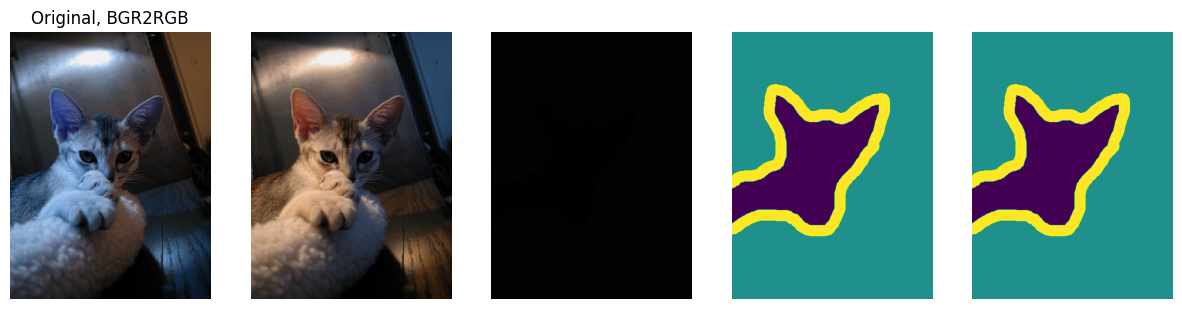

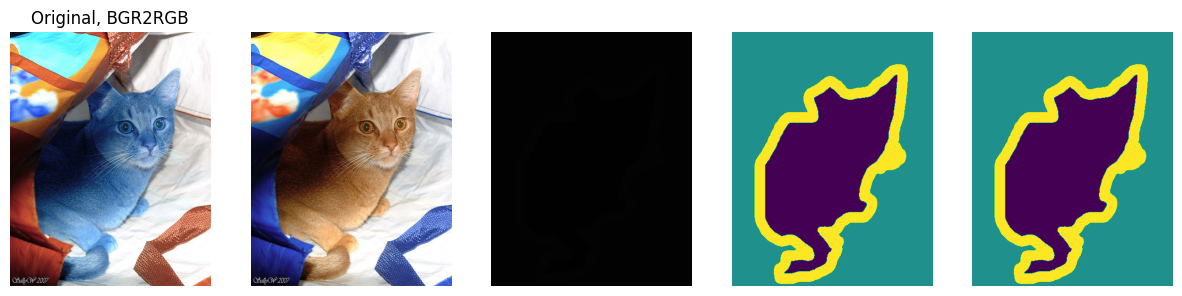

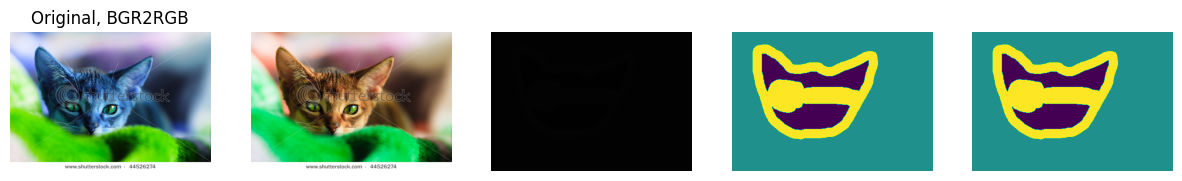

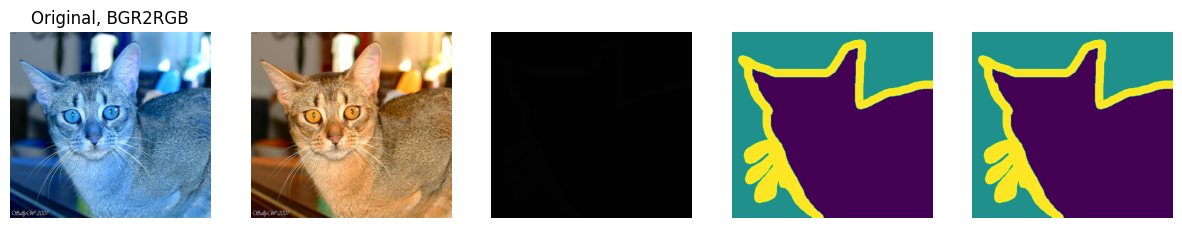

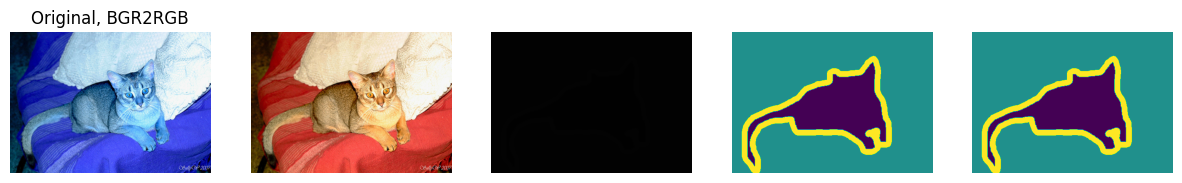

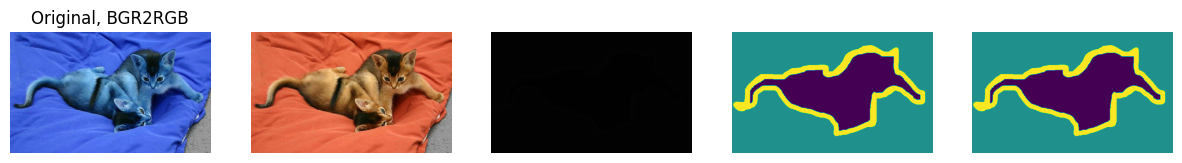

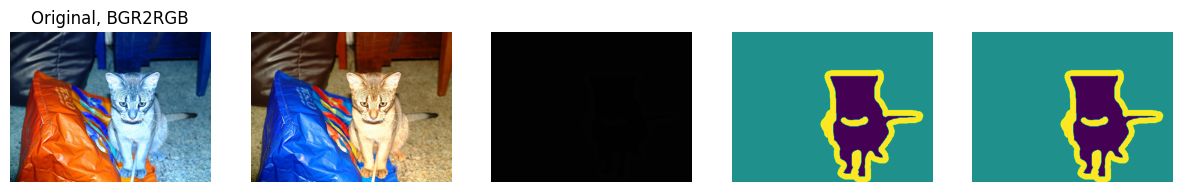

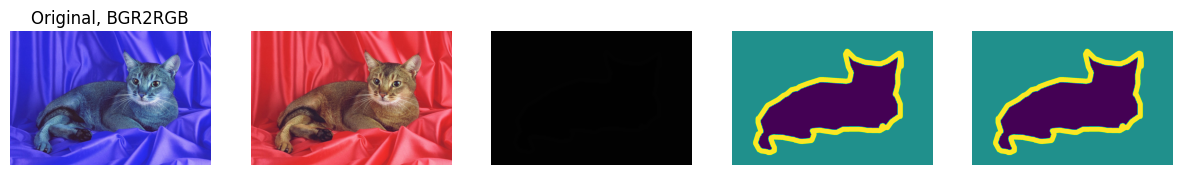

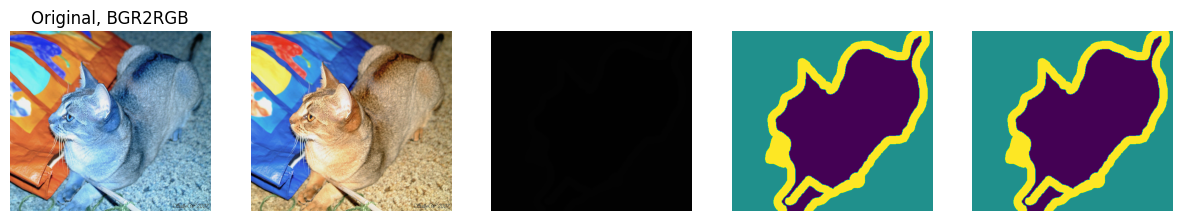

In [50]:
from PIL import ImageOps
from IPython.display import display,Image

for idx in range(10):
    img = cv2.imread(img_src[idx])
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_src[idx])
    mask1 = cv2.imread(mask_src[idx], 0)
    mask2 = mask1.copy()
    mask2 -= 1

    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
    for a in ax.ravel() : a.set_axis_off()
    label = ["Original, BGR2RGB"]
    for i in range(len(label)): ax[i].set_title(label[i])
    ax[0].imshow(img)
    ax[1].imshow(img2)
    ax[2].imshow(mask)
    ax[3].imshow(mask1)
    ax[4].imshow(mask2)

In [ ]:
import tkinter as tk
from tkinter import filedialog
def select_to_preview():
    filename = filedialog.askopenfilename(
        initialdir = input_dir,
        title= "Select file",
        filetypes= (("Image files", "*.jpg"),)
    )
    print(filename)
    _path = os.path.split(filename)
    print(_path)
    result = _path[1].split(".")
    print(result)
    image = "./images/{}.jpg".format(result[0])
    trimap = "./annotations/trimaps/{}.png".format(result[0])
    display(Image(image))
    img = ImageOps.autocontrast(tf.keras.preprocessing.image.load_img(trimap))
    display(img)

app = tk.Tk()

tk.Button(app, text="Click to open", command=select_to_preview).pack(fill=tk.BOTH)



app.mainloop()

In [65]:
def is_jpg(filename):
    data = open(filename, "rb").read(10)
    print(data)
    if data != b'\xff\xd8\xff\xe0\x00\x10JFIF':
        return False
    return True

missmatch = []
for idx in range(len(img_src)):
    if is_jpg(img_src[idx]):
        missmatch.append((idx, img_src[idx]))  # Append a tuple containing both items
print(len(missmatch))
print(missmatch)

b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\xd8\xff\xe0\x00\x10JFIF'
b'\xff\x

In [66]:
def prepare_data(image_src, mask_src, img_size=(160, 160)):
    x = np.zeros((len(image_src),) + (img_size[0], img_size[1], 3), dtype="float32")
    for idx in range(len(image_src)):
        img = tf.keras.preprocessing.image.load_img(image_src[idx], target_size=img_size)
        x[idx] = img
    y = np.zeros((len(mask_src),) + (img_size[0], img_size[1], 1), dtype="float32")
    for idx in range(len(mask_src)):
        img = tf.keras.preprocessing.image.load_img(mask_src[idx], target_size=img_size, color_mode="grayscale")
        y[idx] = np.expand_dims(img, 2)
        y[idx] -= 1
    return x, y

def load_data(image_src, mask_src, shuffle=True, st=50, sp=20, ex=10, img_size=(160, 160)):
    if shuffle:
        random.Random(1337).shuffle(image_src)
        random.Random(1337).shuffle(mask_src)
    train_x, test_x = image_src[:st], image_src[st:st+sp]
    train_y, test_y = mask_src[:st], mask_src[st:st+sp]
    val_x, val_y = image_src[st+sp:st+sp+ex], mask_src[st+sp:st+sp+ex]

    train_x, train_y = prepare_data(train_x, train_y)
    test_x, test_y = prepare_data(test_x, test_y)
    val_x, val_y = prepare_data(val_x, val_y)
    return train_x, train_y, test_x, test_y, val_x, val_y

In [70]:
trainset, testset, valset = load_data(st=500, sp=100, ex=100)
train_image, train_mask = trainset
val_image, val_mask = testset


TypeError: load_data() missing 2 required positional arguments: 'image_src' and 'mask_src'

In [53]:
print(train_image.shape, train_mask.shape)
print(val_image.shape, val_mask.shape)

NameError: name 'train_image' is not defined

NameError: name 'train_image' is not defined

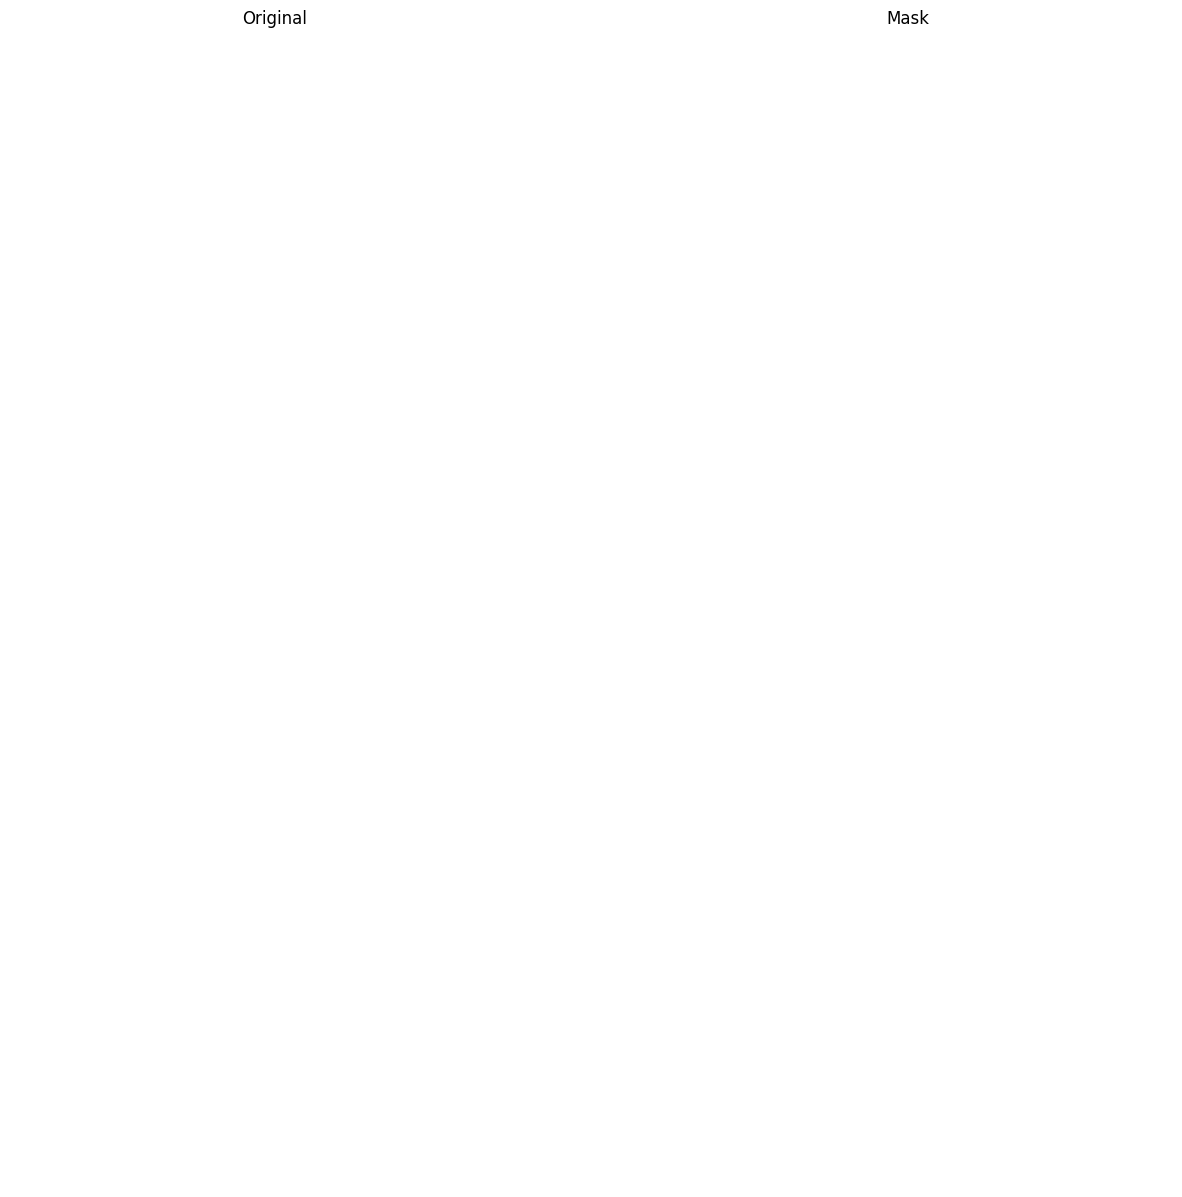

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
for a in ax.ravel() : a.set_axis_off()
label = ["Original", "Mask"]
for i in range(len(label)): ax[i].set_title(label[i])
ax[0].imshow(train_image[0].astype("uint8"))
ax[1].imshow(train_mask[0].astype("uint8"))

In [ ]:
def get_model(img_size, num_classes):
    inputs = tk.keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = tk.keras.layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = tk.keras.layers.BatchNormalization()(x)
    x = tk.keras.layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = tk.keras.layers.Activation("relu")(x)
        x = tk.keras.layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = tk.keras.layers.BatchNormalization()(x)

        x = tk.keras.layers.Activation("relu")(x)
        x = tk.keras.layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = tk.keras.layers.BatchNormalization()(x)

        x = tk.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = tk.keras.layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = tk.keras.layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = tk.keras.layers.Activation("relu")(x)
        x = tk.keras.layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = tk.keras.layers.BatchNormalization()(x)

        x = tk.keras.layers.Activation("relu")(x)
        x = tk.keras.layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = tk.keras.layers.BatchNormalization()(x)

        x = tk.keras.layers.UpSampling2D(2)(x)

        # Project residual
        residual = tk.keras.layers.UpSampling2D(2)(previous_block_activation)
        residual = tk.keras.layers.Conv2D(filters, 1, padding="same")(residual)
        x = tk.keras.layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = tk.keras.layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(
        x
    )

    # Define the model
    model = tk.keras.Model(inputs, outputs)
    return model


In [ ]:
model = get_model(img_size, num_classes=3)
model.summary()

In [ ]:
model.compile(
    optimizer=optimizers.legacy.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    
)

In [46]:
trainset, testset = load_data(st=500, sp=100, ex=100)
train_image, train_mask = trainset
val_image, val_mask = testset

class DisplayCallback(tk.keras.callbacks.Callback):
    def __init__(self, epoch_interval=None, img_src= val_image, mask= val_mask):
        self.epoch_interval = epoch_interval
        self.image = img_src
        self.mask = mask

    def on_epoch_end(self, epoch, logs=None):
        tf.keras.callbacks.ModelCheckpoint("pat_segmentation.h5", save_best_only=True)
        y_predict = model.predict(self.image)
        mask = np.argmax(y_predict, axis=-1)
        mask = np.expand_dims(mask, axis=-1)
        for idx in range(3):
            fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5,5))
            for a in ax.ravel() : a.set_axis_off()
            ax[0].imshow(self.image[idx].astype("uint8"))
            ax[1].imshow(self.mask[idx].astype("uint8"))
            ax[2].imshow(mask[idx].astype("uint8"))
            plt.show()
            plt.close()


callbacks = [DisplayCallback(1)]

TypeError: can only concatenate tuple (not "int") to tuple

In [45]:
history = model.fit(
    x = train_image,
    y = train_mask,
    batch_size=1,
    epochs=20,
    validation_data=(val_image, val_mask),
    callbacks=callbacks,
    shuffle=True,
)

NameError: name 'model' is not defined